In [53]:
import cv2
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.utils import plot_model
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import os
import joblib
from dataprep.eda import *

In [28]:
train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train.flow_from_directory('C:/Users/Mua/Downloads/data/xray_dataset_covid19/train/',
                                                 target_size = (64, 64),
                                                 batch_size = 2,
                                                 class_mode = 'binary')

Found 148 images belonging to 2 classes.


In [30]:
test = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
testing_set = test.flow_from_directory('C:/Users/Mua/Downloads/data/xray_dataset_covid19/test/',
                                                 target_size = (64, 64),
                                                 batch_size = 2,
                                                 class_mode = 'binary')

Found 40 images belonging to 2 classes.


In [31]:
training_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [34]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(input_shape=(64,64)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dropout(rate = 0.2),
    keras.layers.Dense(2,activation='softmax')

])

In [36]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
model.fit(training_set,validation_data=testing_set, epochs=10)

Epoch 1/10
74/74 [==============================] - 20s 207ms/step - loss: 0.6818 - accuracy: 0.5541 - val_loss: 0.3077 - val_accuracy: 0.9250
Epoch 2/10
74/74 [==============================] - 13s 181ms/step - loss: 0.6156 - accuracy: 0.7230 - val_loss: 0.3087 - val_accuracy: 0.9750
Epoch 3/10
74/74 [==============================] - 15s 209ms/step - loss: 0.4967 - accuracy: 0.8243 - val_loss: 0.4737 - val_accuracy: 0.8250
Epoch 4/10
74/74 [==============================] - 13s 169ms/step - loss: 0.4424 - accuracy: 0.8514 - val_loss: 0.4184 - val_accuracy: 0.8750
Epoch 5/10
74/74 [==============================] - 12s 157ms/step - loss: 0.4705 - accuracy: 0.8108 - val_loss: 0.4637 - val_accuracy: 0.8500
Epoch 6/10
74/74 [==============================] - 11s 155ms/step - loss: 0.3803 - accuracy: 0.8784 - val_loss: 0.1353 - val_accuracy: 1.0000
Epoch 7/10
74/74 [==============================] - 12s 159ms/step - loss: 0.3517 - accuracy: 0.8649 - val_loss: 0.1230 - val_accuracy: 0.9750

In [39]:
joblib.dump(model,"covid_19 detection.joblob")

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                            

['covid_19 detection.joblob']

In [40]:
model = joblib.load("covid_19 detection.joblob")

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-03-27 13:14:02         4114
metadata.json                                  2023-03-27 13:14:02           64
variables.h5                                   2023-03-27 13:14:04     19901624
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
...

In [41]:
def getlabel(x):
    for i in training_set.class_indices:
        if training_set.class_indices[i] == x:
            return i

In [42]:
def predict_image(path):
    img = image.load_img(path,target_size=(64,64))
    img = np.expand_dims(img, axis=0)
    p = model.predict(img)
    pred = [np.argmax(element) for element in p]
    print (plt.imshow(cv2.imread(path)))
    return getlabel(pred[0])

1/1 [==============================] - 0s 257ms/step
AxesImage(80,52.8;496x369.6)


'PNEUMONIA'

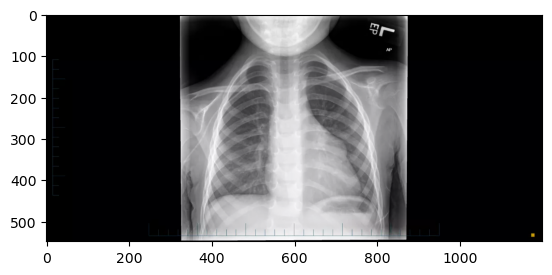

In [46]:
predict_image("C:/Users/Mua/Downloads/all-x-ray-pa-2.webp")

1/1 [==============================] - 0s 43ms/step
AxesImage(80,52.8;496x369.6)


'PNEUMONIA'

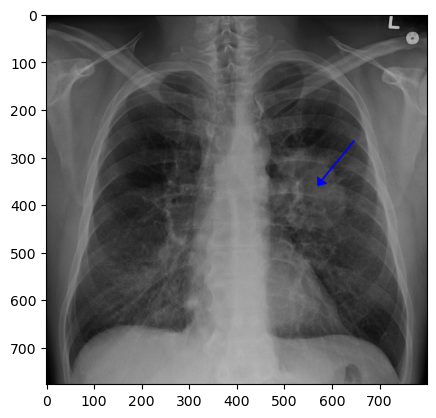

In [47]:
predict_image("C:/Users/Mua/Downloads/LungCACXR.PNG")

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1